In [ ]:
#Importamos el archivo
from google.colab import files
uploaded = files.upload()

Saving brain_dataset.zip to brain_dataset.zip


In [ ]:
import zipfile
import io

#Descomprimimos el archivo .zip para visualizar sus datos
data = zipfile.ZipFile(io.BytesIO(uploaded['brain_dataset.zip']),'r')
data.extractall()

In [ ]:
#Importamos librerias
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import Input, Activation, LeakyReLU, Dropout
from keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Asignamos el archivo a una variable principal
main_dataset = "/content/brain_tumor_dataset"

In [ ]:
#Visualizamos su contenido
os.listdir(main_dataset)

In [ ]:
#Aplicamos la funcion listdir al dataset para que regrese una lista con los nombres de las entradas y lo asignamos a una variable
sub_carpeta = os.listdir(main_dataset)

#Creamos un for para que nos muestre el contenido de la variable
for nombre in sub_carpeta:
    print(f"La sub carpeta {nombre} contiene {len(os.listdir(main_dataset +'/'+ nombre))} imagenes")

In [ ]:
#Creamos una funcion para cambiar el tamaño y color de la imagenes
def load_images(folder):
    
    imgs = []
    target = 0
    labels = []
    for i in os.listdir(folder):
        subdir = os.path.join(folder, i)
        for j in os.listdir(subdir):
            img_dir = os.path.join(subdir,j)
            try:
                img = cv2.imread(img_dir)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img, (128,128))
                imgs.append(img)
                labels.append(target)
            except:
                continue
        target += 1

#Visualizamos los arrays de las imagenes y etiquetas
    imgs = np.array(imgs)
    labels = np.array(labels)
    
    return imgs, labels

In [ ]:
data, labels = load_images(main_dataset)
data.shape, labels.shape

In [ ]:
#Creamos una funcion para vizualizar 10 imagenes del dataset por categoria
def plot_images(start, end):
    plt.figure(figsize=(22,8))
    for i in range(10):
        axs = plt.subplot(2,5, i+1)
        idx = np.random.randint(start, end)
        plt.imshow(data[idx], cmap='gray')
        plt.axis('on')
        axs.set_xticklabels([])
        axs.set_yticklabels([])
        plt.subplots_adjust(wspace=None, hspace=None)

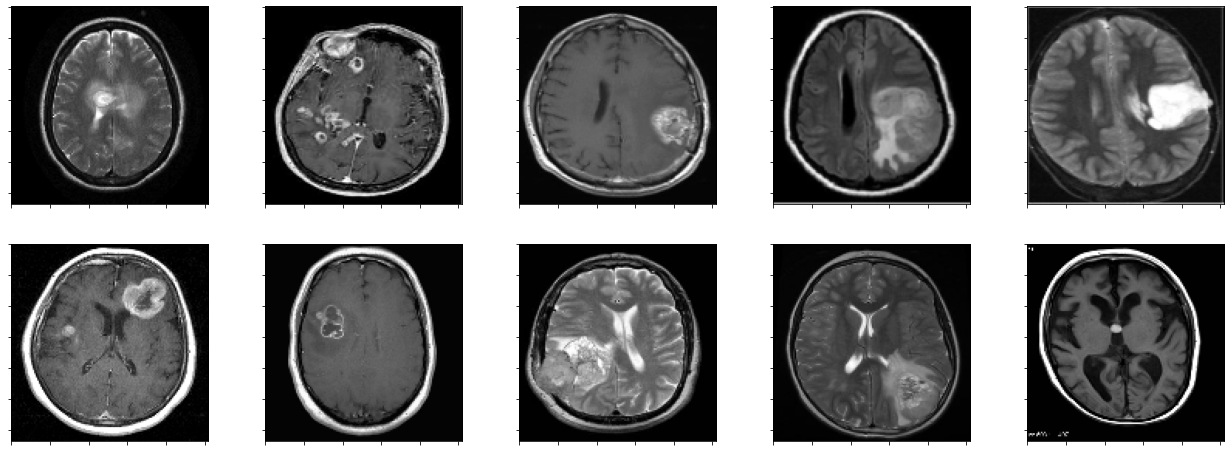

In [ ]:
#Imagenes con tumor
plot_images(0, 155)

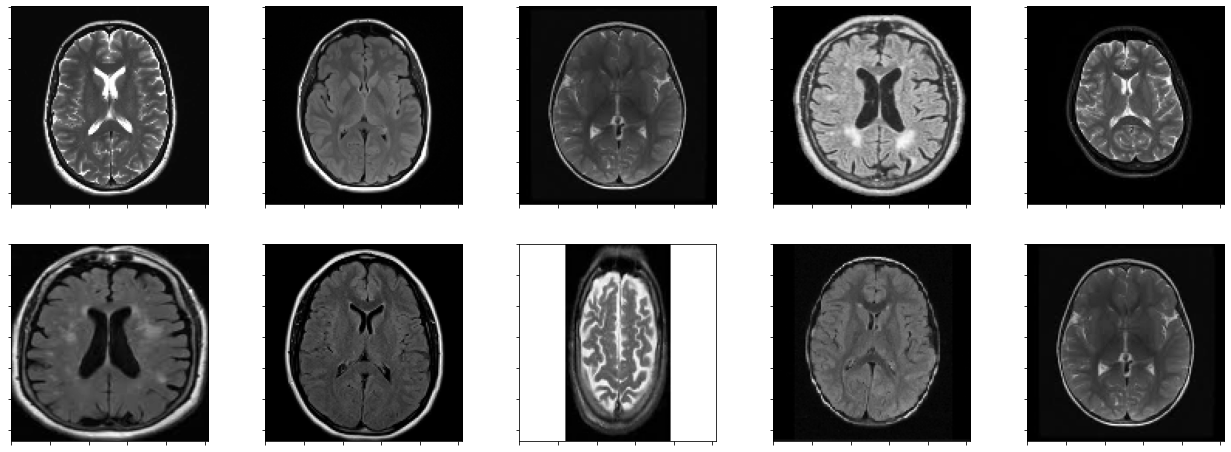

In [ ]:
#Imagenes sin tumor
plot_images(156, 253)

In [ ]:
norm_data = data / 255. 
norm_data = np.expand_dims(norm_data, axis=3)
norm_data.shape, norm_data[0]

In [ ]:
#Añadimos un numero para randomizar
SEED = 40
tf.random.set_seed(SEED)

#Creamos nuestra red nueronal convulucional
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,activation='relu', input_shape=(128,128,1)),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Conv2D(16,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilamos el modelo
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Establecemos la cantidad de epochs y el rango de la validacion
history = model.fit(norm_data, labels, epochs=8, validation_split=0.20)

Epoch 1/8
7/7 [==============================] - 18s 2s/step - loss: 0.6531 - accuracy: 0.5842 - val_loss: 0.1816 - val_accuracy: 1.0000
Epoch 2/8
7/7 [==============================] - 17s 2s/step - loss: 0.6729 - accuracy: 0.6584 - val_loss: 0.6639 - val_accuracy: 0.5294
Epoch 3/8
7/7 [==============================] - 17s 2s/step - loss: 0.5772 - accuracy: 0.7178 - val_loss: 0.4176 - val_accuracy: 0.8824
Epoch 4/8
7/7 [==============================] - 17s 2s/step - loss: 0.5330 - accuracy: 0.7228 - val_loss: 0.4860 - val_accuracy: 0.8039
Epoch 5/8
7/7 [==============================] - 17s 2s/step - loss: 0.5019 - accuracy: 0.7376 - val_loss: 0.4066 - val_accuracy: 0.8431
Epoch 6/8
7/7 [==============================] - 17s 2s/step - loss: 0.4731 - accuracy: 0.7624 - val_loss: 0.3323 - val_accuracy: 0.9216
Epoch 7/8
7/7 [==============================] - 17s 2s/step - loss: 0.4490 - accuracy: 0.7723 - val_loss: 0.4894 - val_accuracy: 0.7647
Epoch 8/8
7/7 [==========================

In [ ]:
result = model.evaluate(norm_data, labels, verbose=0)
print(f"Accuracy on Evaluation: {result[1]*100:.2f}%\nLoss: {result[0]:.4f}")

Accuracy on Evaluation: 86.96%
Loss: 0.3271


In [ ]:
np.random.seed(SEED)
idxs = np.random.randint(0, 252, 20)

In [ ]:
y_pred_prob = model.predict(norm_data[idxs])
y_pred = np.array([1 if prob>0.5 else 0 for prob in y_pred_prob])

y_true = labels[idxs]
y_pred.shape, y_true.shape

1/1 [==============================] - 1s 736ms/step


((20,), (20,))

In [ ]:
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1])

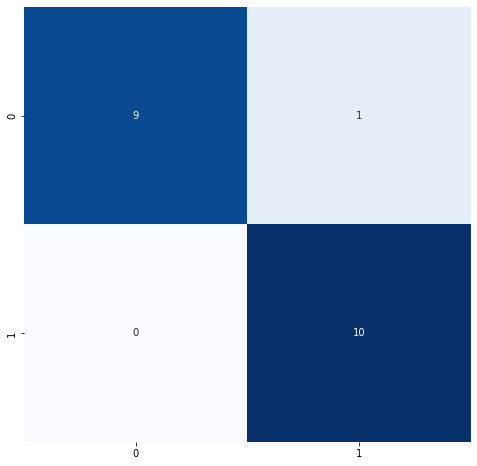

In [ ]:
plt.figure(figsize=(8,8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, cmap="Blues", annot=True, fmt=".2g", cbar=False)
plt.show()

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



In [ ]:
#Resumen de la red neuronal aplicada
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 64)      640       
                                                                 
 conv2d_9 (Conv2D)           (None, 124, 124, 32)      18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 conv2d_11 (Conv2D)          (None, 58, 58, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 29, 29, 16)       0         
 2D)                                                  

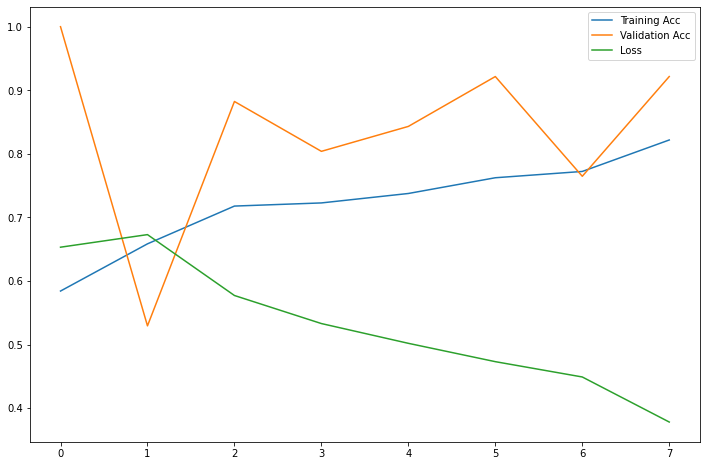

In [ ]:
#Histograma para ver el comportamiento del entrenamiento y la validacion
histdf = pd.DataFrame(history.history)

plt.figure(figsize=(12,8))
plt.plot(histdf['accuracy'], label='Training Acc')
plt.plot(histdf['val_accuracy'], label='Validation Acc')
plt.plot(histdf['loss'], label='Loss')
plt.legend()
plt.show()